In [952]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import multivariate_normal
from scipy.optimize import minimize
import math

In [953]:
#DONE
def sigmoid_squashing(x):
    return 1./(1+np.exp(-x))

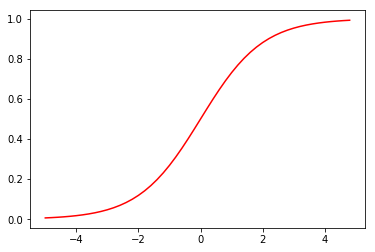

In [954]:
#DONE
def draw_sigmoid():    
    x = np.arange(-5., 5., 0.2)
    n = len(x)
    y = np.ones(n)

    for i in range(n):
        y[i] = sigmoid_squashing(x[i])

    plt.plot(x, y, 'r')
    plt.show()
draw_sigmoid()

In [955]:
#DONE
def sigmoid_1(x):
    return math.erf(math.sqrt(math.pi)*x/2)

In [956]:
#DONE
def sigmoid_2(x):
    return np.tanh(x)

In [957]:
#DONE
def sigmoid_3(x):
    return (2./math.pi)*np.arcsin(np.tanh((math.pi/2.)*x))

In [958]:
#DONE
def sigmoid_4(x):
    return x/np.sqrt(1+x**2)

In [959]:
#DONE
def sigmoid_5(x):
    return (2./math.pi)*np.arctan((math.pi*x/2.))

In [960]:
#DONE
def sigmoid_6(x):
    return x/(1 + np.absolute(x))

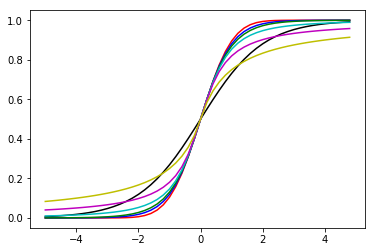

In [961]:
#DONE
def draw_sigmoid_examples():
    x = np.arange(-5., 5., 0.2)
    n = len(x)
    y = np.ones(n)
    y_1 = np.ones(n)
    y_2 = np.ones(n)
    y_3 = np.ones(n)
    y_4 = np.ones(n)
    y_5 = np.ones(n)
    y_6 = np.ones(n)

    for i in range(n):
        y = sigmoid(x)
        y_1[i] = (sigmoid_1(x[i]) + 1) / 2
        y_2[i] = (sigmoid_2(x[i]) + 1) / 2
        y_3[i] = (sigmoid_3(x[i]) + 1) / 2
        y_4[i] = (sigmoid_4(x[i]) + 1) / 2
        y_5[i] = (sigmoid_5(x[i]) + 1) / 2
        y_6[i] = (sigmoid_6(x[i]) + 1) / 2

    plt.plot(x, y, 'k', x, y_1, 'r', x, y_2, 'b', x, y_3, 'g', x, y_4, 'c', x, y_5, 'm', x, y_6, 'y')
    plt.show()
    
draw_sigmoid_examples()

In [962]:
#DONE
def kernal(x, y, params):
    diff = np.subtract.outer(x, y)
    value = params[0]**2 * np.exp( -0.5 * (1.0/params[1]**2) *diff**2)
    value += params[2]**2 * np.exp( -0.5 * (1.0/params[3]**2) *diff**2)
    return value

In [963]:
def find_f(K, y, iterations):
    n = len(y)
    f = np.zeros(n)
    
    y_giv_f = np.zeros(n)
    grad = np.ones(n)
    for i in range(0, iterations):
        for j in range(n):
            y_giv_f[j] = 1./(1+np.exp(-f[j]*y[j]))
            grad[j] = (y[j]+1)/2.-sigmoid(f[j])
        f = np.matmul(K, grad)
    return f, y_giv_f

In [964]:
#DONE
def calculate_W(y_giv_f):
    return np.diag(-np.gradient(np.gradient(np.log(y_giv_f))))

In [965]:
#DONE
def calculate_KP(K, W):
    return K + np.linalg.inv(W)

In [966]:
#DONE
def GP(x_new, x, y, kernal, theta):
    K = kernal(x, x, theta) # K
    KS = kernal(x_new, x, theta) # K*
    KSS = kernal(x_new, x_new, theta) # K**
    
    f, y_giv_f = find_f(K, y, 100)
    
    KP = calculate_KP(K, calculate_W(y_giv_f))

    f_bar = np.matmul(np.matmul(KS, np.linalg.inv(K)), f)    
    var = KSS - KS.dot(np.linalg.inv(KP).dot(KS.T))
    var = np.diagonal(var)
    return(f_bar.squeeze(), var.squeeze())

In [967]:
#DONE
def pretty_plot(fig, axs, xlim=(-20,20), ylim=(-1.5,1.5), size=(10,10)):
    plt.ylim(ylim)
    plt.xlim(xlim)
    fig.set_size_inches(size)
    plt.show()

In [968]:
#DONE
def get_low_and_high(y_bar, var):
    sigma = np.sqrt(var)
    y_low = y_bar - 1.96 * sigma
    y_high = y_bar + 1.96 * sigma
    return y_low, y_high

In [969]:
#DONE
def optimize_theta(x, y, kernal, params_0=[0.1, 0.1, 0.1, 0.1]):
    def log_pY(theta):
        K = np.matrix(kernal(x, x, theta))
        f, y_giv_f = find_f(K, y, 100)
        W = find_W(y_giv_f)
        log_k = np.log(np.matmul(np.linalg.det(K), np.linalg.det(np.linalg.inv(K)+W)))
        output = 0.5 * np.log(np.matmul(np.matmul(f.T, np.linalg.inv(K)),f))
        output += 0.5 * log_k
        output -= np.log(y_giv_f)
        return output

    res = minimize(log_pY, params_0, method='nelder-mead', options={'xtol': 1e-8, 'disp': False})
    return list(res.x)

In [970]:
#DONE
x_1 = np.random.choice(np.linspace(-11, -9, 100), 10, replace=False)
x_2 = np.random.choice(np.linspace(-1, 1, 100), 10, replace=False)
x_3 = np.random.choice(np.linspace(9, 11, 100), 10, replace=False)
x = np.concatenate((x_1, x_2, x_3), axis=0)
y = -1 * np.ones(len(x))
y[np.where(abs(x)<2)] = 1

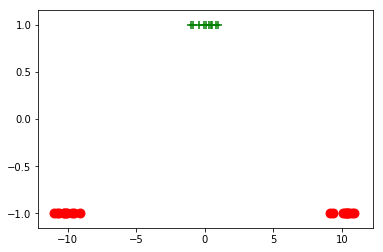

In [971]:
#DONE
def show_plot():
    for i in range(len(x)):
        if y[i] > 0:
            plt.scatter(x[i], y[i], 80, marker='+', color='g')
        else:
            plt.scatter(x[i], y[i], 80, marker='o', color='r')
    plt.show()
show_plot()

In [972]:
x_new = np.linspace(-15, 15, 30)
theta = [.4, 6, 0.5, 0.1]
theta = optimize_theta(x, y, kernal, params_0=[0.1, 0.1, 0.1, 0.1])
y_bar, var = GP(x_new, x, y, kernal, theta)

fig, axs = plt.subplots(1, 1)
for i in range(len(x)):
    if y[i] > 0:
        axs.scatter(x[i], y[i], 80, marker='+', color='g')
    else:
        axs.scatter(x[i], y[i], 80, marker='o', color='r')
axs.plot(x_new, y_bar,  color='k')
pretty_plot(fig, axs)

ValueError: setting an array element with a sequence.

In [914]:
x_new = np.linspace(-15, 15, 30)
theta = [1, 0.5]
y_bar, var = GP(x_new, x, y, kernal, theta)
y_low, y_high = get_low_and_high(y_bar, var)

fig, axs = plt.subplots(1, 1)
axs.fill_between(x_new, y_low, y_high, alpha=0.5, color='r')
for i in range(len(x)):
    if y[i] > 0:
        axs.scatter(x[i], y[i], 100, marker='+', color='g')
    else:
        axs.scatter(x[i], y[i], 100, marker='o', color='r')
prob = np.zeros(len(y_bar))
for i in range(len(y_bar)):
    prob[i] = sigmoid(y_bar[i])
axs.plot(x_new, prob,  color='k')
pretty_plot(fig, axs)

IndexError: list index out of range